<h1>Análise Exploratória de Dados de filmes e séries da Netflix</h1>
<p align='justify'>A <a href="https://www.netflix.com/br/">Netflix</a> é uma plataforma de serviço online de streaming norte-americano de mídia e vídeos sob demanda por assinatura (Over The Top - OTT) lançada em 2010 e disponível em mais de 190 países <cite><a href="https://pt.wikipedia.org/wiki/Netflix#cite_note-12">[Wikipedia]</a></cite>.</p>

<p align='justify'>Como premissa para as análises e organização do projeto, é utilizada a metodologia <a href="https://www.datascience-pm.com/crisp-dm-2/">Cross Industry Standard Process for Data Mining (CRISP-DM)</a>.</p>

<pre>
<strong>Sumário</strong>

<a href="#business_understanding">1 - Entendimento do Negócio</a>
<a href="#data_understanding">2 - Entendimento dos Dados</a>
<a href="#data_preparation">3 - Preparação dos Dados</a>
<a href="#eda">4 - Visualização dos Dados</a>
<a href="#deploy">5 - Deploy - Streamlit</a>
</pre>

<h2 id=business_understanding>Entendimento do Negócio</h2>
<p align='justify'>O conjunto de dados em análise, se refere a uma lista de filmes e séries disponíveis na Netflix, com informações por exemplo do elenco, diretores, classificações, ano de lançamento, duração, entre outras mais.</p>

<h3>Dicionário de dados</h3>
<p align='justify'>Abaixo é demonstrado os campos (colunas) e sua respectiva descrição a que se refere tal dado.</p>

|Campo|Descrição|
|:-|:-|
| show_id | ID exclusivo para cada filme / programa de TV (série) |
| type | Identificador de filme ou programa de TV (série) |
| title | Título do filme/programa de TV (série) |
| director | diretor do filme |
| cast | Atores envolvidos no filme/programa de TV (série) |
| country | País onde o filme/programa foi produzido |
| date_added | Data em que foi adicionado à Netflix |
| release_year | Ano de lançamento real do filme ou programa de TV (série) |
| rating | Classificação do filme/programa de TV (série) |
| duration | Duração Total - em minutos ou número de temporadas |
| listed_in | Categoria do filme/programa de TV (série) |
| description | Descrição do filme/programa de TV (série) |

<h2 id=data_understanding>Entendimento dos Dados</h2>
<p align='justify'>Nesta etapa é realizada a exploração dos dados, com o objetivo de entender as características da base de dados e possíveis ajustes necessários a serem realizados antes da etapa de visualização.</p>

In [49]:
# Importando Bilbiotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [51]:
# Leitura dos dados
df = pd.read_csv("dados/netflix_titles.csv")

# Proporção dos dados em linhas e colunas
df.shape

(8807, 12)

In [52]:
# Verificando os metadados da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [63]:
# Verificando os tipos de dados.
print("Tipos de dados e sua frequência\n{}".format(df.dtypes.value_counts()))

Tipos de dados e sua frequência
object    11
int64      1
dtype: int64


In [53]:
# Verificação da existência de dados ausentes/faltantes
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [60]:
# Verificando dados nulos.
df.isna().sum(axis=1)

0       1
1       1
2       1
3       3
4       1
       ..
8802    0
8803    3
8804    0
8805    0
8806    0
Length: 8807, dtype: int64

In [61]:
meia_amostra = len(df) / 2
meia_amostra

4403.5

In [62]:
df.dropna(thresh=meia_amostra, axis=1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [58]:
# Verificando a Estatística Básica dos dados numéricos.
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.loc[df["director"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [18]:
df.groupby(by=["type", "duration"]).count()

show_id  title  director  cast  country  date_added  \
type    duration                                                         
Movie   10 min           1      1         0     1        1           1   
        100 min        108    108       104    98      103         108   
        101 min        116    116       115   110      110         116   
        102 min        122    122       120   118      117         122   
        103 min        114    114       112   108      109         114   
...                    ...    ...       ...   ...      ...         ...   
TV Show 5 Seasons       65     65         6    65       64          64   
        6 Seasons       33     33         3    32       33          33   
        7 Seasons       23     23         1    23       22          23   
        8 Seasons       17     17         3    16       16          17   
        9 Seasons        9      9         3     9        8           9   

                   release_year  rating  listed_in  description  
type    duration                                                 
Movie   10 min                1       1          1            1  
        100 min             108     108        108          108  
        101 min             116     116        116          116  
        102 min             122     122        122          122  
        103 min             114     114        114          114  
...                         ...     ...        ...          ...  
TV Show 5 Seasons            65      65         65           65  
        6 Seasons            33      33         33           33  
        7 Seasons            23      23         23           23  
        8 Seasons            17      17         17           17  
        9 Seasons             9       9          9            9  

[220 rows x 10 columns]

In [41]:
df.country.value_counts()[0]

2818

<Axes: ylabel='country'>

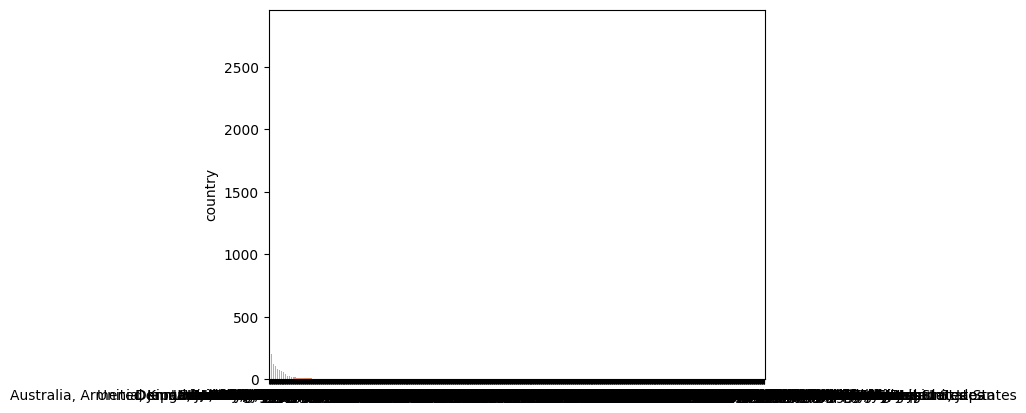

In [43]:
sns.barplot(x=df.country.value_counts().index, y=df.country.value_counts())

In [ ]:
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

In [44]:
colunas = df.columns
for col in colunas:
  print("|",col,"|","|")

| show_id | |
| type | |
| title | |
| director | |
| cast | |
| country | |
| date_added | |
| release_year | |
| rating | |
| duration | |
| listed_in | |
| description | |
| num_linhas | |


## Referências
- https://matplotlib.org/2.0.2/users/pyplot_tutorial.html
- https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips
- https://medium.com/@bernardolago/gr%C3%A1ficos-usando-seaborn-61f7d23481cf
- https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
- https://www.kaggle.com/datasets/shivamb/netflix-shows
- https://libraries.io/pypi/cutecharts